In [4]:
import csv

# Nombre del archivo de entrada (TXT) y de salida (CSV)
input_file = 'data3.txt' # repetir para cada archivo TXT
output_file = 'data3.csv'

# Especifica el delimitador que se utiliza en tu archivo TXT
delimitador = ','  # Puedes cambiarlo a '\t' para tabulaciones, ';' para punto y coma, etc.

# Abre el archivo TXT y el archivo CSV
with open(input_file, 'r', encoding='utf-8') as txt_file, open(output_file, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Itera sobre cada línea del archivo TXT
    for line in txt_file:
        # Divide la línea en elementos utilizando el delimitador especificado
        row = line.strip().split(delimitador)
        # Escribe la fila en el archivo CSV
        csv_writer.writerow(row)

print(f"Archivo {output_file} creado exitosamente.")


Archivo data3.csv creado exitosamente.


In [73]:
!pip install streamlit

You should consider upgrading via the 'D:\desarrollo\proyecto\venv\Scripts\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 8.5/8.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 97.9/97.9 KB 701.6 kB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 KB 1.8 MB/s eta 0:00:00
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
     -------------------------------------- 240.7/240.7 KB 1.2 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     -------------------------------------- 207.3/207.3 KB 1.6 MB/s eta 0:00:00
     -------------------------------------- 857.8/857.8 KB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 82.9/82.9 KB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 25.9/25.9 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 KB 2.5 MB/s eta 0:00:00
     -------------------------------------- 133.3/133.3 KB 2.0 MB/s eta 0:00:00
     ------

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.animation import FuncAnimation

In [14]:
# Leer datos del archivo CSV
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')
data3 = pd.read_csv('data3.csv')


In [19]:
data1.head()

,"""Time""","""Wl-ShootingVoltage""","""Wl-Depth""","""Wl-ShootingVoltage"".1"
0,2024-05-16 03:21:35,-1,20184,-1
1,2024-05-16 03:21:35,-1,20186,-1
2,2024-05-16 03:21:35,-1,20186,-1
3,2024-05-16 03:21:35,-1,20187,-1
4,2024-05-16 03:21:35,0,20189,0


In [18]:
data1.describe()

,"""Wl-ShootingVoltage""","""Wl-Depth""","""Wl-ShootingVoltage"".1"
count,2290.000000,2290.000000,2290.000000
mean,-5.951528,20406.034934,-5.951528
std,25.472414,66.436110,25.472414
min,-220.000000,20184.000000,-220.000000
25%,-1.000000,20357.000000,-1.000000
50%,-1.000000,20418.000000,-1.000000
75%,-1.000000,20450.000000,-1.000000
max,0.000000,20498.000000,0.000000


In [20]:
data1.isnull().sum()

"Time"                    0
"Wl-ShootingVoltage"      0
"Wl-Depth"                0
"Wl-ShootingVoltage".1    0
dtype: int64

In [42]:
time = data1['"Time"'].values
shooting_voltage = data1['"Wl-ShootingVoltage"'].values
depth = data1['"Wl-Depth"'].values

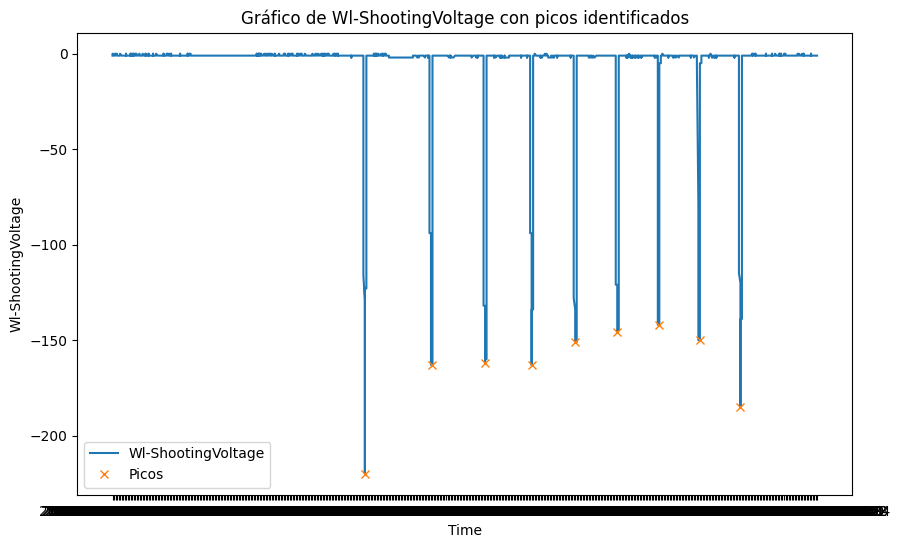

In [33]:
# Identificación de picos en 'Wl-ShootingVoltage'
#peaks, _ = find_peaks(-shooting_voltage, height=10)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(time, shooting_voltage, label='Wl-ShootingVoltage')
plt.plot(time[peaks], shooting_voltage[peaks], "x", label='Picos')
plt.xlabel('Time')
plt.ylabel('Wl-ShootingVoltage')
plt.title('Gráfico de Wl-ShootingVoltage con picos identificados')
plt.legend()
plt.show()



In [52]:
# Función para identificar los picos y devolver el valor de profundidad en cada pico
def identify_peaks(shooting_voltage, depth):
    peaks, _ = find_peaks(-shooting_voltage, height=10)
    peak_depths = depth[peaks]
    return peaks, peak_depths

In [53]:
# Uso de la función
peaks, peak_depths = identify_peaks(shooting_voltage, depth)
#print("Posiciones de los picos:", peaks)
#print("Valores de profundidad en los picos:", peak_depths)

In [50]:
# Calcular atributos de los picos: prominencia y ancho
#prominences = peak_prominences(inverted_voltage, peaks)[0]
#widths = peak_widths(inverted_voltage, peaks, rel_height=0.5)[0]

# Crear un DataFrame con las firmas de los picos
peak_signatures = pd.DataFrame({
    'Time': time[peaks],
    'Profundidad': depth[peaks],
    'Altura': shooting_voltage[peaks]
})
peak_signatures

,Time,Profundidad,Altura
0,2024-05-16 03:24:23,20450,-220
1,2024-05-16 03:25:08,20446,-163
2,2024-05-16 03:25:43,20430,-162
3,2024-05-16 03:26:14,20414,-163
4,2024-05-16 03:26:43,20399,-151
5,2024-05-16 03:27:11,20383,-146
6,2024-05-16 03:27:39,20366,-142
7,2024-05-16 03:28:06,20351,-150
8,2024-05-16 03:28:33,20335,-185


MovieWriter ffmpeg unavailable; using Pillow instead.


Frame: 0
Current peaks: []
Frame: 1
Current peaks: []
Frame: 2
Current peaks: []
Frame: 3
Current peaks: []
Frame: 4
Current peaks: []
Frame: 5
Current peaks: []
Frame: 6
Current peaks: []
Frame: 7
Current peaks: []
Frame: 8
Current peaks: []
Frame: 9
Current peaks: []
Frame: 10
Current peaks: []
Frame: 11
Current peaks: []
Frame: 12
Current peaks: []
Frame: 13
Current peaks: []
Frame: 14
Current peaks: []
Frame: 15
Current peaks: []
Frame: 16
Current peaks: []
Frame: 17
Current peaks: []
Frame: 18
Current peaks: []
Frame: 19
Current peaks: []
Frame: 20
Current peaks: []
Frame: 21
Current peaks: []
Frame: 22
Current peaks: []
Frame: 23
Current peaks: []
Frame: 24
Current peaks: []
Frame: 25
Current peaks: []
Frame: 26
Current peaks: []
Frame: 27
Current peaks: []
Frame: 28
Current peaks: []
Frame: 29
Current peaks: []
Frame: 30
Current peaks: []
Frame: 31
Current peaks: []
Frame: 32
Current peaks: []
Frame: 33
Current peaks: []
Frame: 34
Current peaks: []
Frame: 35
Current peaks: []
Fr

ValueError: unknown file extension: .mp4

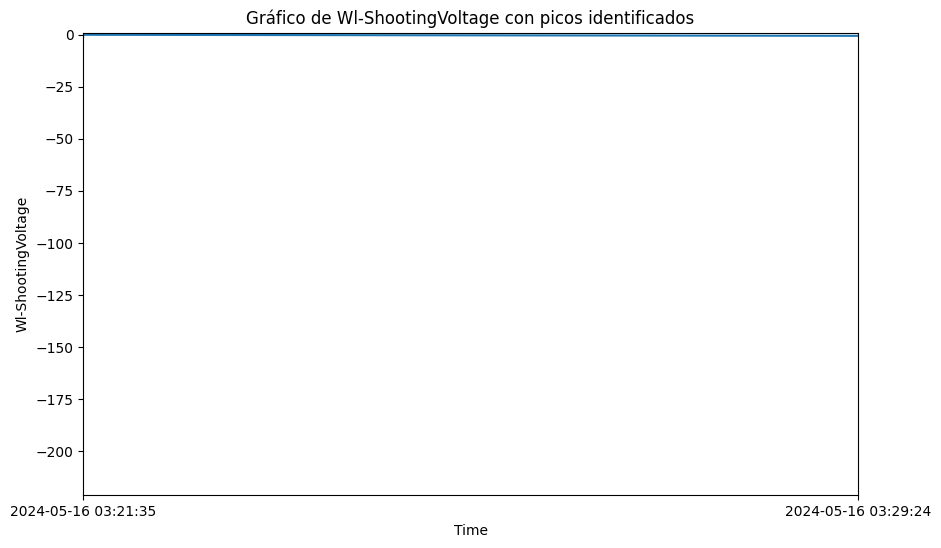

In [72]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(time[0], time[-1])
ax.set_ylim(min(shooting_voltage) - 1, max(shooting_voltage) + 1)
ax.set_xlabel('Time')
ax.set_ylabel('Wl-ShootingVoltage')
ax.set_title('Gráfico de Wl-ShootingVoltage con picos identificados')

# Crear líneas iniciales vacías
line, = ax.plot([], [], label='Wl-ShootingVoltage')
peaks_line, = ax.plot([], [], 'x', label='Picos')

# Función de inicialización para la animación
def init():
    line.set_data([], [])
    peaks_line.set_data([], [])
    return line, peaks_line

# Función de actualización para la animación
def update(frame):
    print(f'Frame: {frame}')
    # Actualizar los datos de la línea
    line.set_data(time[:frame], shooting_voltage[:frame])
    
    # Identificar los picos en el rango actual
    current_peaks, _ = find_peaks(-shooting_voltage[:frame], height=10)
    print(f'Current peaks: {current_peaks}')
    
    # Actualizar los datos de los picos
    peaks_line.set_data(time[current_peaks], shooting_voltage[current_peaks])
    
    return line, peaks_line

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(time),init_func=init, blit=True, repeat=True)

#ani.save('anim.mp4', writer = 'ffmpeg', fps = 30) 
# Mostrar la animación
#plt.legend()
#plt.show()


In [38]:
def differentiate_first_peak(peaks, peak_depths):
    first_peak_signature = peak_depths[0]
    remaining_peaks_signature = peak_depths[1:]
    return first_peak_signature, remaining_peaks_signature


In [39]:
# Uso de la función
first_peak_signature, remaining_peaks_signature = differentiate_first_peak(peaks, peak_depths)
print("Firma del primer pico:", first_peak_signature)
print("Firmas de los picos restantes:", remaining_peaks_signature)

Firma del primer pico: 20450
Firmas de los picos restantes: [20446 20430 20414 20399 20383 20366 20351 20335]
